In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mumbai_flats_cleaned_v5.csv')
df

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_propert,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
0,3 BHK Flat,3.95,Kanjurmarg West,1550,25480.0,recent construction,Higher,Fully Furnished,3,2,1,yes
1,1 BHK Flat,0.19,Palghar,630,3020.0,recent construction,Middle,Unfurnished,1,1,2,yes
2,1 BHK Flat,0.73,Mira Road East,580,12590.0,new construction,Lower,Semi Furnished,1,2,2,no
3,1 BHK Flat,1.10,Dahisar East,410,26830.0,new construction,Higher,Semi Furnished,1,2,1,yes
4,3 BHK Flat,2.25,others,1052,21390.0,new construction,Lower,Semi Furnished,3,2,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8371,2 BHK Flat,2.25,Chembur,960,23440.0,recent construction,Higher,Semi Furnished,2,2,0,yes
8372,3 BHK Flat,2.85,Chembur,865,32950.0,recent construction,Higher,Semi Furnished,3,3,0,yes
8373,3 BHK Flat,2.60,Mulund West,886,29340.0,modern property,Higher,Fully Furnished,3,3,0,yes
8374,2 BHK Flat,0.65,Mira Road East,625,10400.0,modern property,Lower,Semi Furnished,2,2,0,no


In [3]:
df.duplicated().sum()

837

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

<Axes: xlabel='flat_type'>

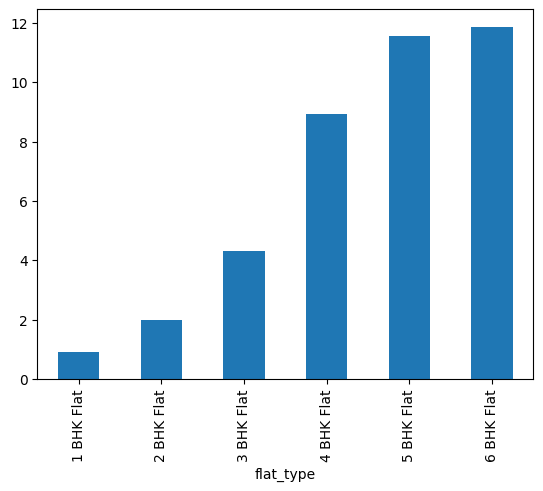

In [66]:
df.groupby('flat_type')['flat_price'].mean().plot(kind='bar')
# by this graph we can say price depends on BHK

<Axes: xlabel='location1'>

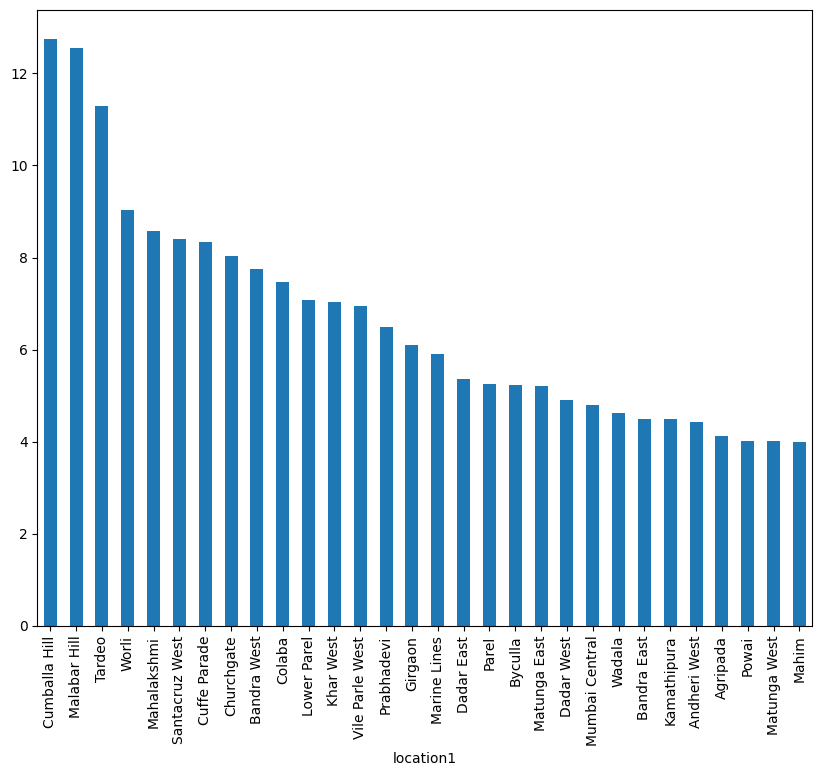

In [67]:
plt.figure(figsize=(10,8))
df.groupby('location1')['flat_price'].mean().sort_values(ascending=False).head(30).plot(kind='bar')


<Axes: xlabel='location1'>

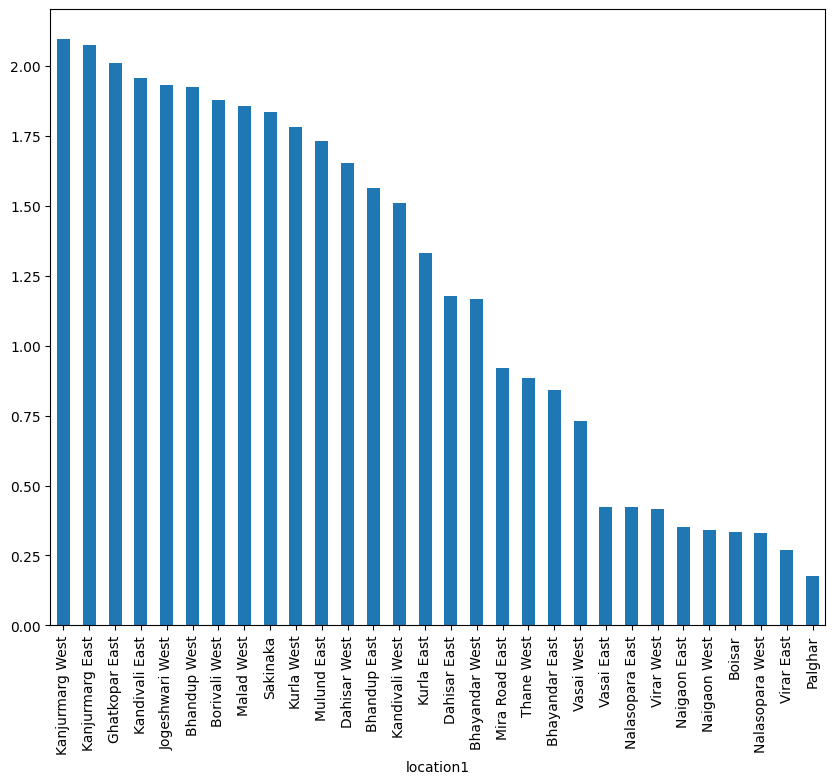

In [68]:
plt.figure(figsize=(10,8))
df.groupby('location1')['flat_price'].mean().sort_values(ascending=False).tail(30).plot(kind='bar')
#location is important feature to predict price

<Axes: xlabel='buildupArea_sqft', ylabel='flat_price'>

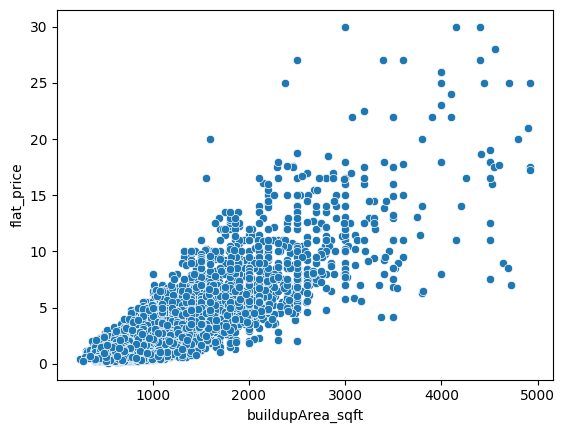

In [6]:
sns.scatterplot(data=df,x='buildupArea_sqft',y='flat_price')
# buildup area is also imp

In [7]:
df[(df['buildupArea_sqft']<2000) & (df['flat_price']>15)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_propert,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
3888,3 BHK Flat,16.5,Malabar Hill,1550,1060.0,old propert,Lower,Semi Furnished,3,3,0,yes
7323,3 BHK Flat,20.0,Malabar Hill,1600,1250.0,recent construction,Higher,Semi Furnished,3,3,0,yes


In [11]:
df.drop(index=[3888,7323],inplace=True)

<Axes: xlabel='avg_price_thousands', ylabel='flat_price'>

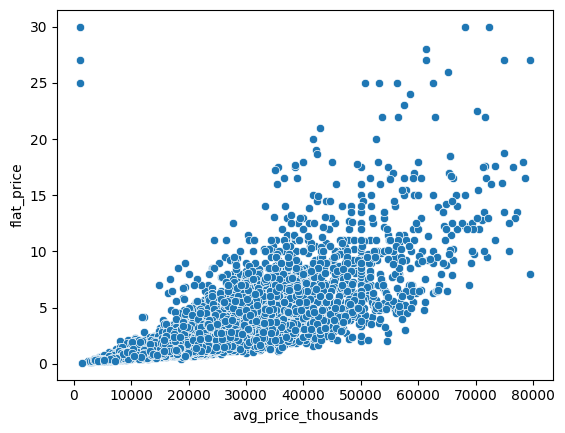

In [12]:
sns.scatterplot(data=df,x='avg_price_thousands',y='flat_price')
# avg price is also important but we can not use is because if user know the avg price avg buildp area then he can cal price
# also there are some outliers

In [13]:
a = df[(df['avg_price_thousands']<3000) & (df['flat_price']>15) ].index
df.drop(index=a,inplace=True)

In [14]:
df.rename(columns={'age_of_propert':'age_of_property'},inplace=True)

<Axes: xlabel='age_of_property'>

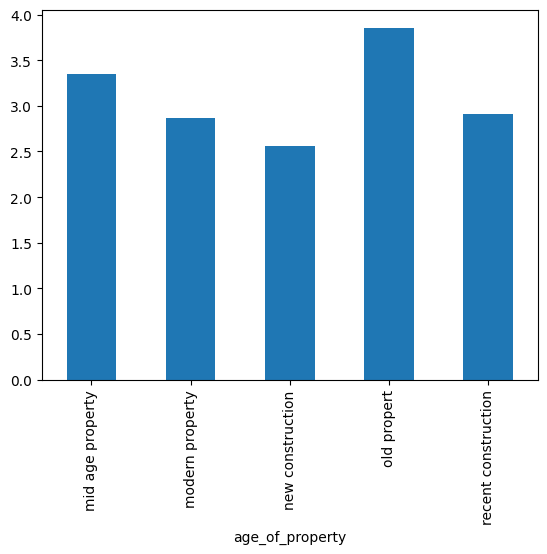

In [15]:
df.groupby('age_of_property')['flat_price'].mean().plot(kind='bar')
# here old propert and mid age propery have higher price

<Axes: xlabel='floor_type'>

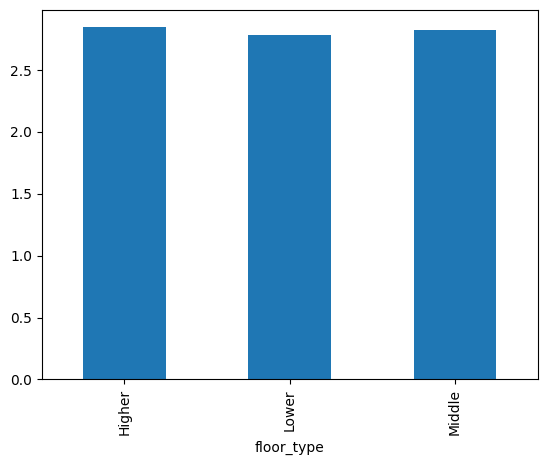

In [74]:
df.groupby('floor_type')['flat_price'].mean().plot(kind='bar')
# floor type is not imp

<Axes: xlabel='furnishing'>

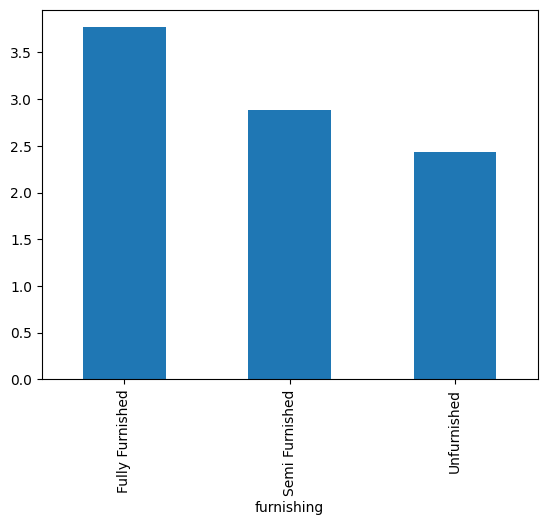

In [75]:
df.groupby('furnishing')['flat_price'].mean().plot(kind='bar')
# furnishing is imp feature to predict price

<Axes: xlabel='bedrooms', ylabel='flat_price'>

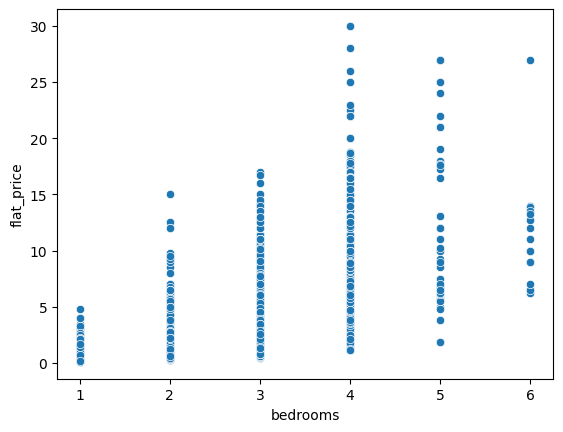

In [16]:
sns.scatterplot(data=df,x='bedrooms',y='flat_price')

In [17]:
df[(df['bedrooms'] == 6) & (df['flat_price']>15)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
2930,6 BHK Flat,27.0,Cumballa Hill,4400,61360.0,mid age property,Higher,Semi Furnished,6,5,1,yes


In [18]:
df.drop(index=2930,inplace=True)

<Axes: xlabel='bedrooms'>

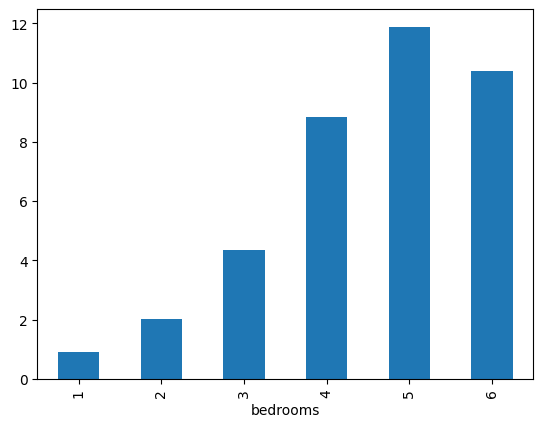

In [19]:
df.groupby('bedrooms')['flat_price'].mean().plot(kind='bar')

<Axes: xlabel='bathrooms'>

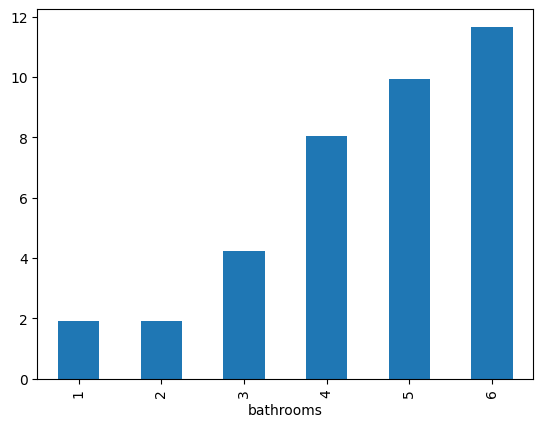

In [20]:
df.groupby('bathrooms')['flat_price'].mean().plot(kind='bar')

<Axes: xlabel='bathrooms', ylabel='flat_price'>

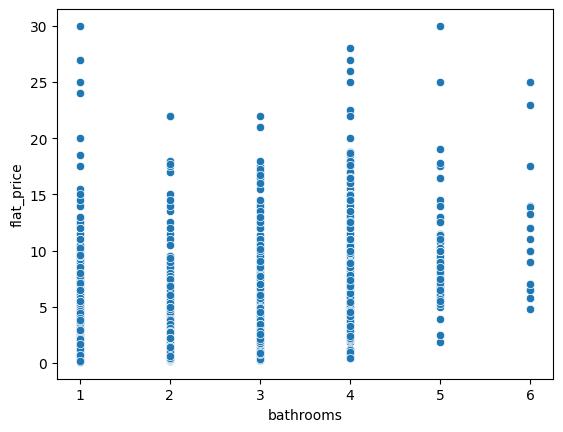

In [22]:
sns.scatterplot(data=df,x='bathrooms',y='flat_price')

In [25]:
a = df[(df['bathrooms'] == 1) & (df['flat_price']>15)].index
df.drop(index=a,inplace=True)

In [29]:
df[(df['bathrooms'] == 5) & (df['flat_price']>20)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
3140,4 BHK Flat,30.0,Prabhadevi,4150,72290.0,new construction,Middle,Unfurnished,4,5,1,yes
4354,5 BHK Flat,25.0,Andheri West,4700,53190.0,recent construction,Middle,Semi Furnished,5,5,2,yes


In [31]:
df.drop(index=[3140,4354],inplace=True)

In [32]:
df[(df['bathrooms'] == 3) & (df['flat_price']>18)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
3061,4 BHK Flat,22.0,Tardeo,3070,71660.0,recent construction,Middle,Semi Furnished,4,3,3,yes
4304,5 BHK Flat,21.0,Powai,4900,42860.0,recent construction,Lower,Fully Furnished,5,3,4,yes


In [33]:
df.drop(index=[3061,4304],inplace=True)

In [34]:
df[(df['bathrooms'] == 6) & (df['flat_price']>15)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
2818,5 BHK Flat,25.0,Powai,4925,50760.0,recent construction,Middle,Semi Furnished,5,6,2,yes
2920,4 BHK Flat,23.0,Andheri West,4000,57500.0,new construction,Middle,Fully Furnished,4,6,1,yes
3036,5 BHK Flat,17.5,Powai,4545,38500.0,recent construction,Lower,Semi Furnished,5,6,1,yes


In [35]:
df.drop(index=[2818,2920,3036],inplace=True)

<Axes: xlabel='bathrooms', ylabel='flat_price'>

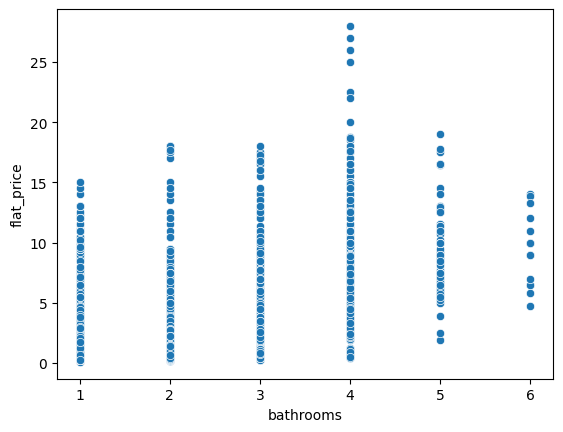

In [36]:
sns.scatterplot(data=df,x='bathrooms',y='flat_price')

In [40]:
a = df[(df['bathrooms'] == 4) & (df['flat_price']>22)].index
df.drop(index=a,inplace=True)

<Axes: xlabel='balcony'>

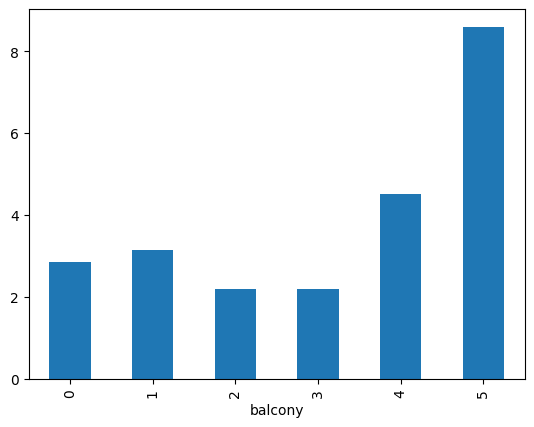

In [21]:
df.groupby('balcony')['flat_price'].mean().plot(kind='bar')

<Axes: xlabel='balcony', ylabel='flat_price'>

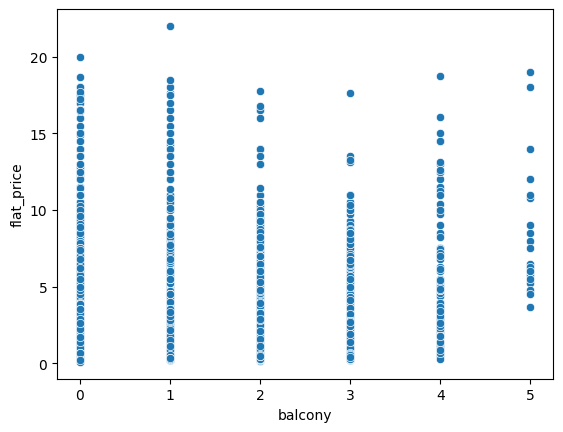

In [41]:
sns.scatterplot(data=df,x='balcony',y='flat_price')

In [43]:
df[(df['balcony'] == 1) & (df['flat_price']>20)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
3035,4 BHK Flat,22.0,Mahalakshmi,4100,53660.0,recent construction,Middle,Semi Furnished,4,4,1,yes


In [44]:
df.drop(index=3035,inplace=True)

#### price increses as number od bathrooms, bedrooms, and balcony increses

<Axes: xlabel='parking'>

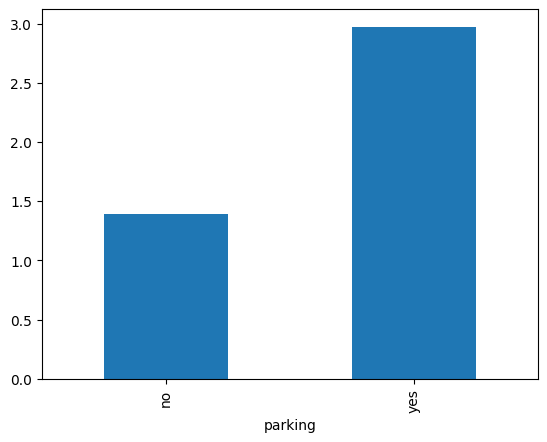

In [80]:
df.groupby('parking')['flat_price'].mean().plot(kind='bar')
# price depends on parking

<Axes: xlabel='parking', ylabel='flat_price'>

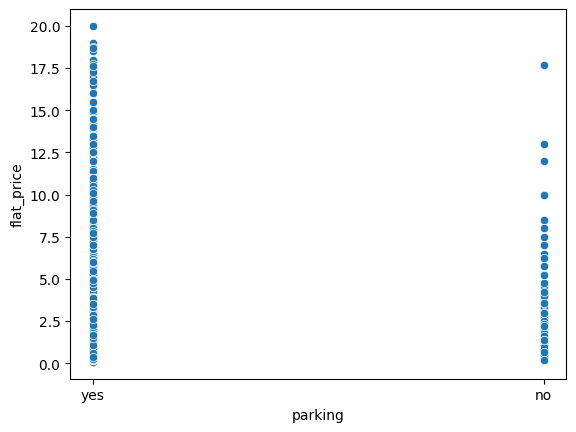

In [45]:
sns.scatterplot(data=df,x='parking',y='flat_price')

In [49]:
a = df[(df['parking'] == 'no') & (df['flat_price']>10)].index
df.drop(index=a,inplace=True)

In [50]:
df

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
0,3 BHK Flat,3.95,Kanjurmarg West,1550,25480.0,recent construction,Higher,Fully Furnished,3,2,1,yes
1,1 BHK Flat,0.19,Palghar,630,3020.0,recent construction,Middle,Unfurnished,1,1,2,yes
2,1 BHK Flat,0.73,Mira Road East,580,12590.0,new construction,Lower,Semi Furnished,1,2,2,no
3,1 BHK Flat,1.10,Dahisar East,410,26830.0,new construction,Higher,Semi Furnished,1,2,1,yes
4,3 BHK Flat,2.25,others,1052,21390.0,new construction,Lower,Semi Furnished,3,2,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8371,2 BHK Flat,2.25,Chembur,960,23440.0,recent construction,Higher,Semi Furnished,2,2,0,yes
8372,3 BHK Flat,2.85,Chembur,865,32950.0,recent construction,Higher,Semi Furnished,3,3,0,yes
8373,3 BHK Flat,2.60,Mulund West,886,29340.0,modern property,Higher,Fully Furnished,3,3,0,yes
8374,2 BHK Flat,0.65,Mira Road East,625,10400.0,modern property,Lower,Semi Furnished,2,2,0,no


<Axes: xlabel='flat_type', ylabel='flat_price'>

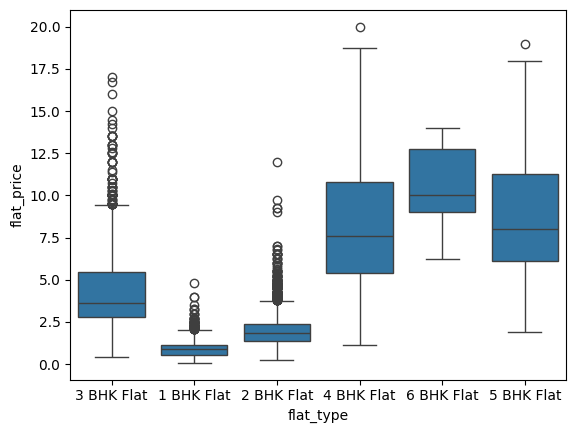

In [51]:
sns.boxplot(data=df,x='flat_type',y='flat_price')

In [53]:
df[(df['flat_type'] == '2 BHK Flat') & (df['flat_price']>10)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
6276,2 BHK Flat,12.0,Colaba,2030,59110.0,modern property,Higher,Semi Furnished,2,2,0,yes


In [54]:
df.drop(index=6276,inplace=True)

In [60]:
df.drop(index=2992,inplace=True)

In [63]:
df[(df['flat_type'] == '5 BHK Flat') & (df['flat_price']>18)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
2736,5 BHK Flat,19.0,Powai,4500,42220.0,recent construction,Lower,Fully Furnished,5,5,5,yes


In [66]:
df.drop(index=2736,inplace=True)

In [83]:
df[(df['flat_type'] == '6 BHK Flat') &(df['flat_price'] >20)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
2930,6 BHK Flat,27.0,Cumballa Hill,4400,61360.0,mid age property,Higher,Semi Furnished,6,5,1,yes
2979,6 BHK Flat,22.0,Mahalakshmi,3500,62860.0,recent construction,Higher,Semi Furnished,5,2,0,yes


In [84]:
df.drop(index=2979,inplace=True)

<Axes: xlabel='age_of_property', ylabel='flat_price'>

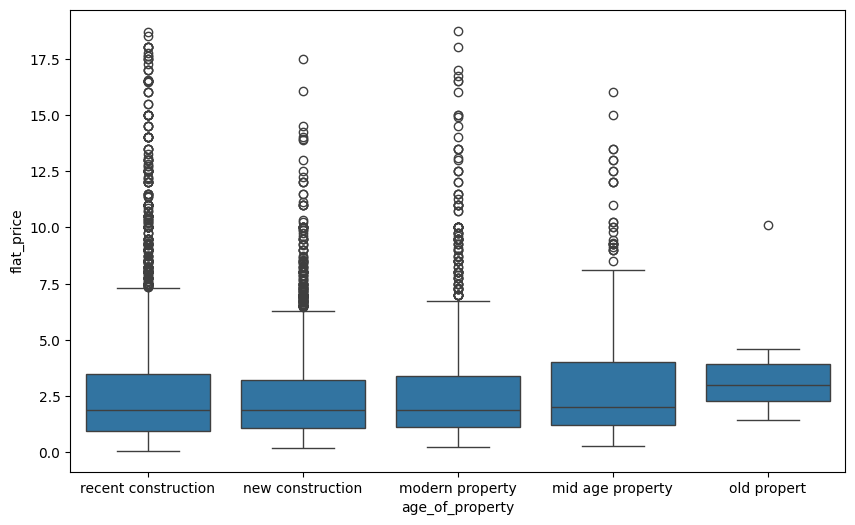

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='age_of_property',y='flat_price')

In [68]:
df[(df['age_of_property'] == 'old propert') & (df['flat_price']>8)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
6334,3 BHK Flat,10.1,Churchgate,1542,65500.0,old propert,Middle,Unfurnished,3,3,1,yes


In [69]:
df.drop(index=6334,inplace=True)

In [70]:
df[(df['age_of_property'] == 'new construction') & (df['flat_price']>15)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
483,4 BHK Flat,16.05,Prabhadevi,2150,74650.0,new construction,Middle,Unfurnished,4,4,4,yes
2773,4 BHK Flat,17.50,Parel,2455,71280.0,new construction,Higher,Unfurnished,4,5,1,yes


In [71]:
df.drop(index=[483,2773],inplace=True)

In [72]:
df[(df['age_of_property'] == 'modern property') & (df['flat_price']>17.5)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
3063,4 BHK Flat,18.00,Khar West,2300,78260.0,modern property,Higher,Semi Furnished,4,4,5,yes
3065,4 BHK Flat,18.75,Bandra West,2500,75000.0,modern property,Middle,Unfurnished,4,4,4,yes


In [73]:
df.drop(index=[3063,3065],inplace=True)

In [75]:
df[(df['age_of_property'] == 'mid age property') & (df['flat_price']>14)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
2824,4 BHK Flat,15.0,Santacruz West,2530,59290.0,mid age property,Lower,Semi Furnished,4,4,0,yes
7398,3 BHK Flat,16.0,Santacruz West,2200,72730.0,mid age property,Higher,Fully Furnished,3,3,1,yes


In [76]:
df.drop(index=[2824,7398],inplace=True)

<Axes: xlabel='furnishing', ylabel='flat_price'>

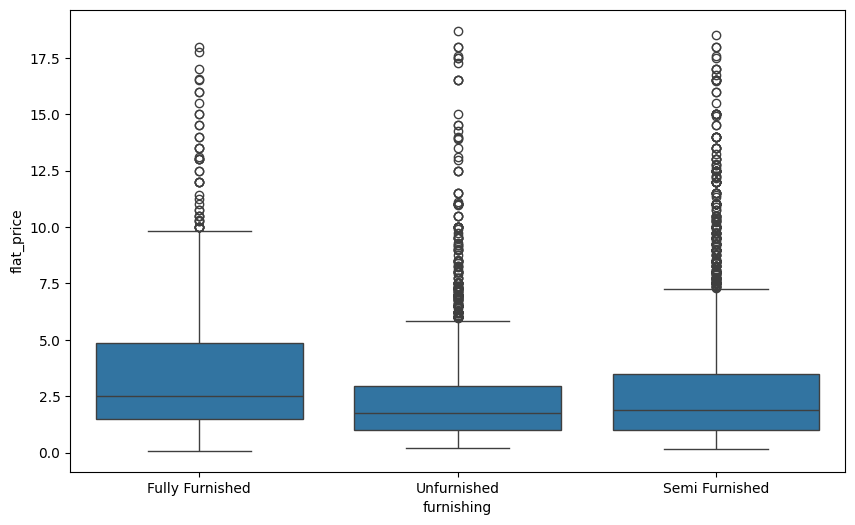

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='furnishing',y='flat_price')

<Axes: xlabel='bedrooms', ylabel='flat_price'>

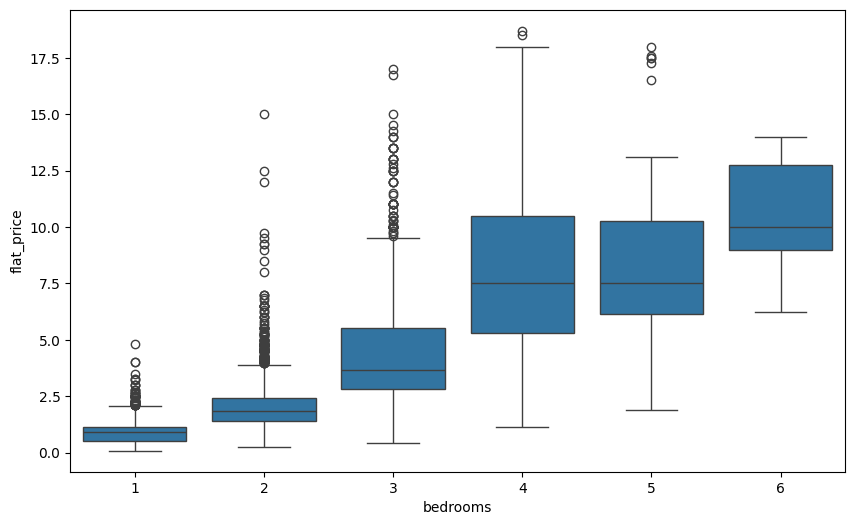

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='bedrooms',y='flat_price')

In [80]:
df[(df['bedrooms'] == 4) & (df['flat_price'] >18)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
3003,4 BHK Flat,18.5,Andheri West,2820,65600.0,recent construction,Middle,Semi Furnished,4,4,1,yes
3182,4 BHK Flat,18.7,Andheri West,4410,42400.0,recent construction,Middle,Unfurnished,4,4,0,yes


In [81]:
df.drop(index=[3003,3182],inplace=True)

In [82]:
df[(df['bedrooms'] == 2) & (df['flat_price'] >10)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
2737,4 BHK Flat,15.0,Powai,3000,50000.0,recent construction,Higher,Semi Furnished,2,2,0,yes
2924,5 BHK Flat,12.5,Chembur,4500,27780.0,new construction,Lower,Unfurnished,2,1,0,yes
6503,3 BHK Flat,12.0,Tardeo,1850,64860.0,modern property,Lower,Fully Furnished,2,1,0,yes


In [86]:
df.drop(index=[2737,2924,6503],inplace=True)

In [83]:
df[(df['bedrooms'] == 3) & (df['flat_price'] >15)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
6608,3 BHK Flat,17.00,Cumballa Hill,2600,65380.0,modern property,Middle,Semi Furnished,3,3,1,yes
7451,3 BHK Flat,16.75,Tardeo,2550,65690.0,modern property,Middle,Semi Furnished,3,3,2,yes


In [87]:
df.drop(index=[6608,7451],inplace=True)

In [85]:
df[(df['bedrooms'] == 5) & (df['flat_price'] >15)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
2785,5 BHK Flat,17.50,Powai,4925,35530.0,recent construction,Lower,Unfurnished,5,3,0,yes
2832,5 BHK Flat,16.50,Powai,4250,38820.0,recent construction,Middle,Unfurnished,5,5,2,yes
2913,5 BHK Flat,17.50,Santacruz West,3200,54690.0,recent construction,Higher,Unfurnished,5,2,0,yes
2923,5 BHK Flat,18.00,Chembur,4000,45000.0,recent construction,Higher,Unfurnished,5,2,1,yes
7234,5 BHK Flat,17.25,Powai,4925,35020.0,recent construction,Lower,Unfurnished,5,3,0,yes
8107,5 BHK Flat,17.60,Parel,2400,73330.0,recent construction,Middle,Unfurnished,5,4,3,yes


In [88]:
df.drop(index=[2913,8107,2923],inplace=True)

<Axes: xlabel='bedrooms', ylabel='flat_price'>

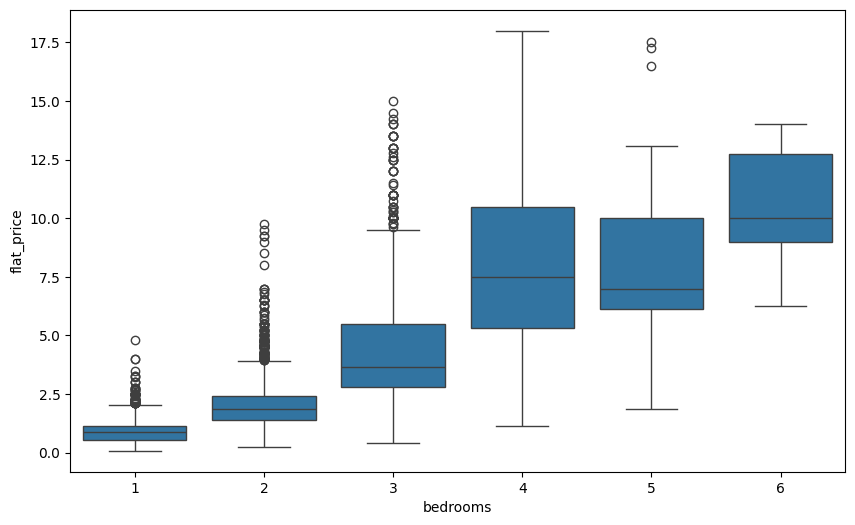

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='bedrooms',y='flat_price')

<Axes: xlabel='bathrooms', ylabel='flat_price'>

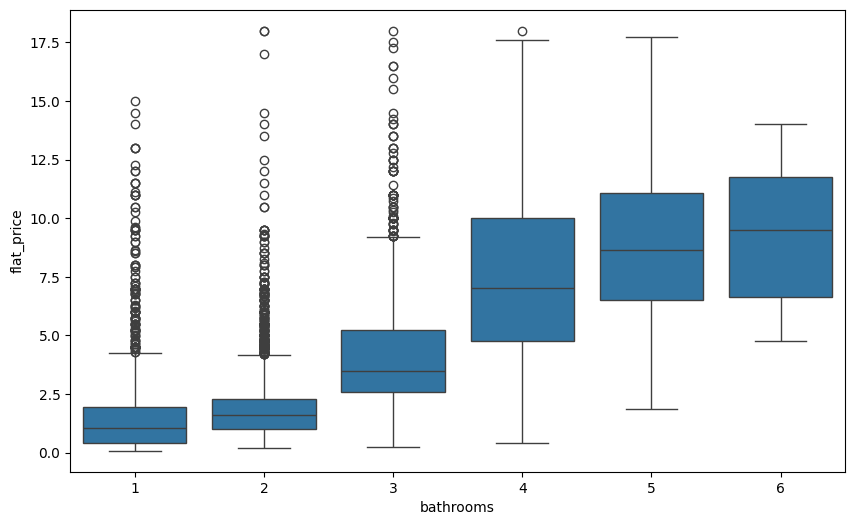

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='bathrooms',y='flat_price')

In [93]:
df[(df['bathrooms'] == 2) & (df['flat_price'] >15)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
303,4 BHK Flat,17.0,Jogeshwari East,2871,59210.0,recent construction,Higher,Fully Furnished,4,2,0,yes
3016,4 BHK Flat,18.0,Bandra West,4500,40000.0,recent construction,Middle,Semi Furnished,4,2,0,yes
3026,4 BHK Flat,18.0,Santacruz West,3400,52940.0,recent construction,Middle,Semi Furnished,4,2,0,yes


In [94]:
df.drop(index=[303,3016,3026],inplace=True)

<Axes: xlabel='balcony', ylabel='flat_price'>

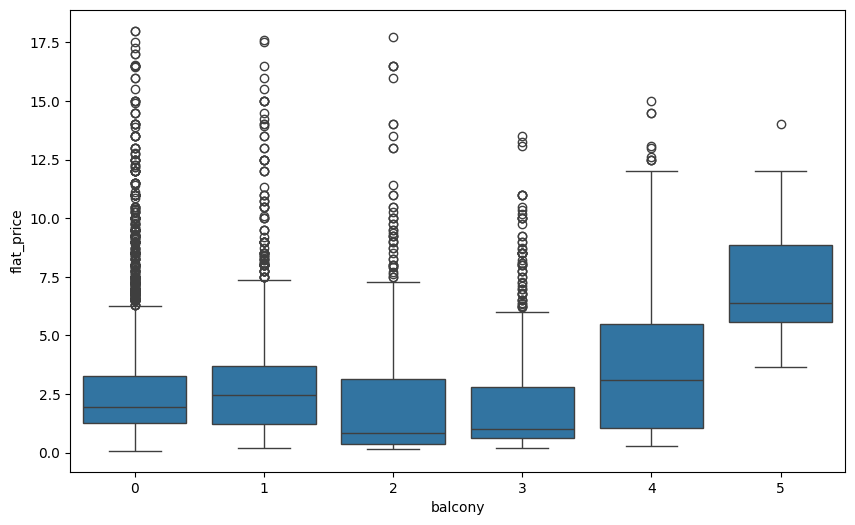

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='balcony',y='flat_price')

In [96]:
df[(df['balcony'] == 5) & (df['flat_price'] >12.5)]

,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,floor_type,furnishing,bedrooms,bathrooms,balcony,parking
7792,4 BHK Flat,14.0,Lower Parel,2800,50000.0,recent construction,Middle,Semi Furnished,4,5,5,yes


In [97]:
df.drop(index=7792,inplace=True)

In [98]:
df.shape

(7483, 12)

In [99]:
df['location1'].value_counts()

location1
Mira Road East    597
Chembur           465
Powai             426
Kandivali East    401
Andheri West      372
                 ... 
Virar East          4
Girgaon             3
Marine Lines        3
Churchgate          2
Naigaon West        1
Name: count, Length: 81, dtype: int64

In [101]:
df['location1'].replace('Naigaon West','others',inplace=True)

In [102]:
df.to_csv('mumbai_flats_cleaned_v6.csv',index=False)